# Hate speech and offensive language detection

![hate](hate.jpg)

Hate speech is any form of expression through which speakers intend to vilify, humiliate, or incite hatred against a group or a class of persons on the basis of race, religion, skin color sexual identity, gender identity, ethnicity, disability, or national origin.

With the advent of social networks, the phenomenon of 'hate speech' has increased despite the official policy of all main social networks that prohibits hate speech. As part of the data scientists team at Twitter (one of the main social networks through which people can share offensive or hateful tweets) our project aims to develop an algorithm that can classify a tweet (or more generally a text) as offensive (or not offensive).

![tweets_hate](twitter_hate.jpg)

A central challenge for automatic hate speech detection is the separation between hate speech from other istances of offensive language. In many cases, swear words are used in a non-offensive manner and are not part of hate speech.
For example a tweet cointaining rap lyrics with potentially offensive language should not be regarded at the same way as a tweet that directs racist slurs at another user.

The code will be developed in Python and will be integrated into an application with a graphical interface in which the user can test its operation by entering any kind of text. 
The algorithm is developed for texts in the English language only.

## Summary

blablabla

## Loading the data

In [1]:
import pandas as pd
import nltk
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
hate_speech_df = pd.read_csv("Dataset1_labeled_data.csv")

In [4]:
hate_speech_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [5]:
hate_speech_df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [6]:
hate_speech_df = hate_speech_df.drop(columns=['Unnamed: 0'])

In [7]:
hate_speech_df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [8]:
hate_speech_df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


## Description of columns

The columns of the dataset 

- count = number of experts who coded each tweet (minimum is 3, sometimes more users coded a tweet when judgments were determined to be unreliable).

- hate_speech = number of experts who judged the tweet to be hate speech.

- offensive_language = number of experts who judged the tweet to be offensive.

- neither = number of experts who judged the tweet to be neither offensive nor non-offensive.

- class = class label for majority of experts: 0 - hate speech, 1 - offensive language, 2 - neither

In [9]:
hate_speech_df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

Text(0.5, 1.0, 'Count of Tweets per Class')

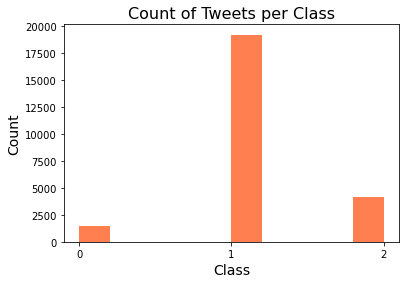

In [70]:
import matplotlib  
import matplotlib.pyplot as plt 

plt.hist(hate_speech_df['class'], color = 'coral')
plt.ylabel('Count', fontsize=14)
plt.xticks([0,1,2])
plt.xlabel('Class', fontsize=14)
plt.title('Count of Tweets per Class', fontsize = 16)


The dataset is unbalanced in favour of tweets containing offensive language compared to hate speech or tweets without any insult.

## Preprocessing of the tweets

In [23]:
tweets=hate_speech_df.tweet

In [25]:
tweets

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [21]:
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()

In [28]:
def preprocess(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    return parsed_text

def tokenize(tweet):
    """Removes punctuation & excess whitespace, sets to lowercase,
    and stems tweets. Returns a list of stemmed tokens."""
    tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
    tokens = [stemmer.stem(t) for t in tweet.split()]
    return tokens

def basic_tokenize(tweet):
    """Same as tokenize but without the stemming"""
    tweet = " ".join(re.split("[^a-zA-Z.,!?]*", tweet.lower())).strip()
    return tweet.split()

vectorizer = TfidfVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=stopwords,
    use_idf=True,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )

Blablabla bon courage Louise et Maéva